Veri Temizleme
* Gürültülü Veri
* Eksik Veri Analizi
* Aykırı Gözlem Analizi

Veri Standartizasyonu
* 0-1 Dönüşümü
* Z Score Dönüşümü
* Logaritmik Dönüşüm

Veri Boyutu İndirgeme
* Gözlem Sayısını Azaltma
* Değişken Sayısını Azaltma

Değişken Dönüştürme
* Sürekli Değişkenlerde Dönüşümler
* Kategorik Değişkenlerde Dönüşümler

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include= ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


AYKIRI GÖZLEM ANALİZİ

Aykırı Gözlem Tespiti

In [3]:
df_table = df["table"]

df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: ylabel='table'>

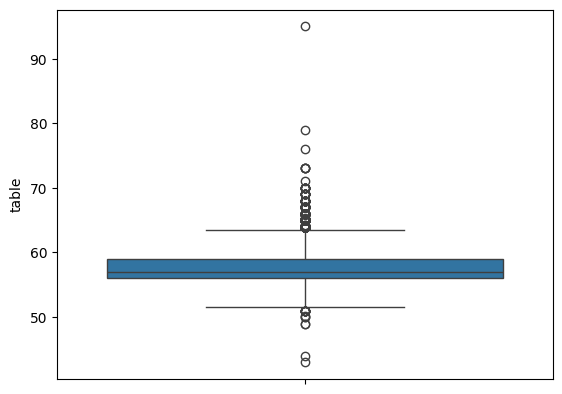

In [4]:
sns.boxplot(df_table)

In [5]:
q1 = df_table.quantile(0.25)
q3 = df_table.quantile(0.75)
iqr = q3 - q1

In [6]:
alt_sinir = q1 - 1.5 * iqr

print(alt_sinir)

51.5


In [7]:
ust_sinir = q3 + 1.5 * iqr

print(ust_sinir)

63.5


In [8]:
df_aykiri_deger_mi = ((df_table < alt_sinir) | (df_table > ust_sinir))

df_aykiri_deger_mi

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [9]:
df_aykiri_deger_mi.value_counts()

table
False    53335
True       605
Name: count, dtype: int64

In [10]:
df_table[df_aykiri_deger_mi]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [11]:
df_table[df_aykiri_deger_mi].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

Aykırı Gözlem Problemini Çözme Yöntemleri (Silme, Ortalamayla Doldurma, Sınırlara Yuvarlama)

In [12]:
df_table = pd.DataFrame(df_table)

df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [13]:
df_table[df_aykiri_deger_mi] = df_table.mean()

In [14]:
df_table[df_aykiri_deger_mi]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


In [15]:
df = diamonds.copy()
df = df.select_dtypes(include= ["float64", "int64"])
df = df.dropna()

In [16]:
df_table = df["table"]

df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [17]:
df_table[df_aykiri_deger_mi]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [18]:
df_table[df_aykiri_deger_mi] = alt_sinir

C:\Users\mehme\AppData\Local\Temp\ipykernel_16888\834284109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_aykiri_deger_mi] = alt_sinir


In [19]:
df_table[df_aykiri_deger_mi]

2        51.5
91       51.5
145      51.5
219      51.5
227      51.5
         ... 
53695    51.5
53697    51.5
53756    51.5
53757    51.5
53785    51.5
Name: table, Length: 605, dtype: float64

In [20]:
df_table[df_aykiri_deger_mi] = ust_sinir

C:\Users\mehme\AppData\Local\Temp\ipykernel_16888\1180418568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_aykiri_deger_mi] = ust_sinir


In [21]:
df_table[df_aykiri_deger_mi]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 605, dtype: float64

EKSİK VERİ ANALİZİ

In [22]:
v1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9 ,15])
v2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
v3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])

df = pd.DataFrame({
    "V1" : v1,
    "V2" : v2,
    "V3" : v3
})

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Eksik Veri Tespiti

In [23]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [24]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [25]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [26]:
df.isnull().sum().sum()

np.int64(7)

In [27]:
df[df.isnull().any(axis= 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


Eksik Gözlem Problemini Çözme Yöntemleri (Silme, Değer Atama)

In [28]:
silinmis_df = df.dropna()

silinmis_df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [29]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [30]:
ortalamayla_doldurulan_v1 = df["V1"].fillna(df["V1"].mean())

ortalamayla_doldurulan_v1

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [31]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [32]:
ortalamayla_doldurulan_df = df.apply(lambda x: x.fillna(x.mean()), axis= 0)

ortalamayla_doldurulan_df

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [33]:
birle_doldurulan_df = df.apply(lambda x: x.fillna(1), axis= 0)

birle_doldurulan_df

,V1,V2,V3
0,1.0,7.0,1.0
1,3.0,1.0,12.0
2,6.0,5.0,5.0
3,1.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,1.0,7.0
6,1.0,1.0,1.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


DEĞİŞKEN STANDARTLAŞTIRMA

Standardizasyon

In [34]:
v1 = np.array([1, 3, 6, 5, 7])
v2 = np.array([7, 7, 5, 8, 12])
v3 = np.array([6, 12, 5, 6, 14])

df = pd.DataFrame({
    "V1" : v1,
    "V2" : v2,
    "V3" : v3
})

df = df.astype(float)

df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [35]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [36]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


Normalizasyon (0-1)

In [37]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [38]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


Min-Max Dönüşümü (Min-Max)

In [39]:
scaler = preprocessing.MinMaxScaler((0, 100))

In [40]:
scaler.fit_transform(df)

array([[  0.        ,  28.57142857,  11.11111111],
       [ 33.33333333,  28.57142857,  77.77777778],
       [ 83.33333333,   0.        ,   0.        ],
       [ 66.66666667,  42.85714286,  11.11111111],
       [100.        , 100.        , 100.        ]])

DEĞİŞKEN DÖNÜŞTÜRME

In [41]:
tips = sns.load_dataset("tips")
df = tips.copy()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


0-1 Dönüşümü

In [42]:
LabelEncoder().fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [43]:
df["yeni_sex"] = LabelEncoder().fit_transform(df["sex"])

In [44]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


İstenilen 1 Ve Diğerleri 0 Dönüşümü

In [45]:
np.where(df["day"].str.contains("Sun"), 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [47]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0
